# 微博数据分析

数据包含微博 500 个用户 2020-1-20 到 2020-3-25 号微博正文，包含字段：微博id，微博正文，原始图片url，被转发微博原始图片url，是否为原创微博，微博视频url，发布位置，发布时间，发布工具，点赞数，转发数，评论数


## 导入库/参数设置

In [19]:
import os
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud
from matplotlib import pyplot as plt

from clean_data import WeiboPreprocess 

In [20]:
start_date = "2020-1-20"
font_path = "../data/Microsoft YaHei Mono.ttf"
post_data_path = "../data/user_data"
stop_words_path = "../data/dictionary/stop_words.txt"
positive_words_path = "../data/dictionary/ntusd-positive.txt"
negative_words_path = "../data/dictionary/ntusd-negative.txt"

In [21]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', 20)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',200)

## 获取数据

In [22]:
def get_data(file_path):
    total = pd.DataFrame()
    # read all xlsx files
    for root, dirs, files in tqdm(os.walk(file_path)):
        # merge all post
        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            df.drop(columns=["微博id", "原始图片url", "被转发微博原始图片url", "微博视频url", "发布位置", "发布工具"], inplace=True)
            total = total.append(df)
    total.columns = ["post", "is_original", "time", "like", "repost", "comment"]
    total["time"] = pd.to_datetime(total["time"]).dt.date
    total.sort_values("time", inplace=True)
    total.reset_index(drop=True, inplace=True)
    # concatenate posts by date
    # total = total.groupby("time")["post"].sum()
    return total
data = get_data(post_data_path)

501it [00:02, 220.52it/s]


## 查看数据基本信息

In [32]:
data.head(20)

,post,is_original,time,like,repost,comment
0,转发理由:飞吻\n原始用户: SNH48-林思意\n转发内容: ！！！ 原图,False,2020-01-01,0,0,0
1,情绪稳定是家人，和关心在乎且会哄我的朋友给的礼物夸我棒棒，我就真的棒棒吧（先这样相信你们太好了呜呜呜呜呜呜呜今天实在是太难了感谢我柚让我不再怀疑自己（你真的太会哄我了，太会了！要说还算有点幸运，那就是即便我像个石头，几乎从不主动联络朋友，仍然会得到关爱（她们都好主动还暖以及今天就连流利说都在鼓励我，Sanna Marin太牛了，我也不能倒下！ [组图共2张] 原...,True,2020-01-01,4,0,0
2,转发理由:#祉攸[超话]# 辛苦了 2020健康平安一切顺利\n原始用户: DREAMCATCHER_7\n转发内容: #Dreamcatcher[超话]# #捕梦网[超话]# [] Dreamcatcher为森nia们送上2020年新年问候 祝大家新年快乐 DREAMCATCHER_7的微博视频,False,2020-01-01,1,0,0
3,分享图片 南京·南京新街口 显示地图原图,True,2020-01-01,4,0,0
4,转发理由:新年爱你@TFBOYS-王源\n原始用户: 王源RoyWang工作室\n转发内容: #王源[超话]#身着牛仔印花夹克亮相湖南卫视跨年演唱会舞台。眸中斑斓生辉，光彩兀自流动，今天@TFBOYS-王源 又一次按下播放键，把他的诚挚唱给你们听。 [组图共4张]原图,False,2020-01-01,0,0,0
5,转发理由:#祉攸[超话]# #那年金日金旼祉#\n原始用户: DREAMCATCHER_7\n转发内容: #Dreamcatcher##捕梦网#[捕梦网] 2018年1月1日各位～新年快乐！能和大家一同开启新的一年感到非常开心，想到以后还能和大家一起制造更多美好的回忆就很心动！感谢各位 爱你们哦 韩国·首尔 [组图共2张]原图,False,2020-01-01,2,0,0
6,转发理由:转发微博\n原始用户: 星闻揭秘\n转发内容: 肖战《神奇》 #肖战神奇唱跳# 舞台，好A好撩@X玖少年团肖战DAYTOY #肖战神奇# #星闻揭秘[超话]# 星闻揭秘的秒拍视频,False,2020-01-01,0,0,0
7,参与新浪新闻年度#娱乐影响力人物#评选，助力爱豆解锁年度霸屏资源，还有#微博之夜#门票等你喜提↓↓↓ 新浪新闻年度娱乐影响力人物?noShareTopic=1,True,2020-01-01,0,0,0
8,转发理由:转发微博\n原始用户: 为站而来DAYTOY\n转发内容: #肖战跳舞##肖战东方卫视跨年# 看看饭拍什么样跳舞也棒 唱歌也棒 你怎么这么神奇 小赞的猫儿的微博视频,False,2020-01-01,0,0,0
9,转发理由:转发微博\n原始用户: 小赞的坚果兔宝宝\n转发内容: #肖战跳舞#感觉有这个视频这个跨年算是圆满了，感谢我今年认识你并了解你，祝所有人新年快乐，祝自己生日快乐#肖战东方卫视跨年##肖战[超话]# 星闻揭秘的微博视频 郑州,False,2020-01-01,0,0,0


In [34]:
data.head(20)

,post,is_original,time,like,repost,comment
0,转发 理由 飞吻 原始 用户 snh 林思意 转发 内容 原图,False,2020-01-01,0,0,0
1,情绪稳定 是 家人 和 关心 在乎 且 会 哄 我 的 朋友 给 的 礼物 夸 我 棒棒 我 就 真的 棒棒 吧 先 这样 相信 你们 太好了 呜呜 呜呜 呜呜 呜 今天 实在 是 太难 了 感谢 我 柚 让 我 不再 怀疑 自己 你 真的 太会 哄 我 了 太会 了 要说 还 算 有点 幸运 那 就是 即便 我 像 个 石头 几乎 从不 主动 联络 朋友 仍然 会 得到 关爱 她们 都 ...,True,2020-01-01,4,0,0
2,转发 理由 祉 攸 辛苦 了 健康 平安 一切顺利 原始 用户 dreamcatcher 转发 内容 dreamcatcher 捕梦网 dreamcatcher 为森 nia 们 送 上 新年 问候 祝 大家 新年快乐 dreamcatcher 的 微博 视频,False,2020-01-01,1,0,0
3,显示 地图 原图,True,2020-01-01,4,0,0
4,转发 理由 新年 爱你 原始 用户 王源 roywang 工作室 转发 内容 王源 身着 牛仔 印花 夹克 亮相 湖南卫视 跨年 演唱会 舞台 眸中 斑斓 生辉 光彩 兀自 流动 今天 又 一次 按下 播放 键 把 他 的 诚挚 唱 给 你们 听 组图 共 张 原图,False,2020-01-01,0,0,0
5,转发 理由 祉 攸 那年 金日 金旼祉 原始 用户 dreamcatcher 转发 内容 dreamcatcher 捕梦网 捕梦网 各位 新年快乐 能 和 大家 一同 开启 新 的 一年 感到 非常 开心 想到 以后 还 能 和 大家 一起 制造 更 多 美好的 回忆 就 很 心动 感谢 各位 爱 你们 哦 组图 共 张 原图,False,2020-01-01,2,0,0
6,转发 理由 原始 用户 星闻 揭秘 转发 内容 肖战 神奇 肖战 神奇 唱 跳 舞台 好 a 好 撩 肖战 神奇 星闻 揭秘,False,2020-01-01,0,0,0
7,参与 新浪 新闻 年度 娱乐 影响力 人物 评选 助力 爱豆 解锁 年度 霸屏 资源 还有 微博之夜 门票 等 你 喜提 新浪 新闻 年度 娱乐 影响力 人物 nosharetopic,True,2020-01-01,0,0,0
8,转发 理由 原始 用户 为 站 而 来 daytoy 转发 内容 肖战 跳舞 肖战 东方 卫视 跨年 看看 饭 拍 什么样 跳舞 也 棒 唱歌 也 棒 你 怎么 这么 神奇 小赞 的 猫儿 的 微博 视频,False,2020-01-01,0,0,0
9,转发 理由 原始 用户 小赞 的 坚果 兔 宝宝 转发 内容 肖战 跳舞 感觉 有 这个 视频 这个 跨年 算是 圆满 了 感谢 我 今年 认识 你 并 了解 你 祝 所有人 新年快乐 祝 自己 生日快乐 肖战 东方 卫视 跨年 肖战 星闻 揭秘 的 微博 视频 郑州,False,2020-01-01,0,0,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11662 entries, 0 to 11661
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   post         11662 non-null  object
 1   is_original  11662 non-null  bool  
 2   time         11662 non-null  object
 3   like         11662 non-null  int64 
 4   repost       11662 non-null  int64 
 5   comment      11662 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 467.1+ KB


In [26]:
data["time"].value_counts()

2020-01-17    213
2020-01-01    200
2020-03-01    195
2020-01-16    191
2020-03-06    185
             ... 
2020-02-16     82
2020-01-30     82
2020-03-30     64
2020-03-28     59
2020-03-31     25
Name: time, Length: 91, dtype: int64

## 每日发布微博数量分布图

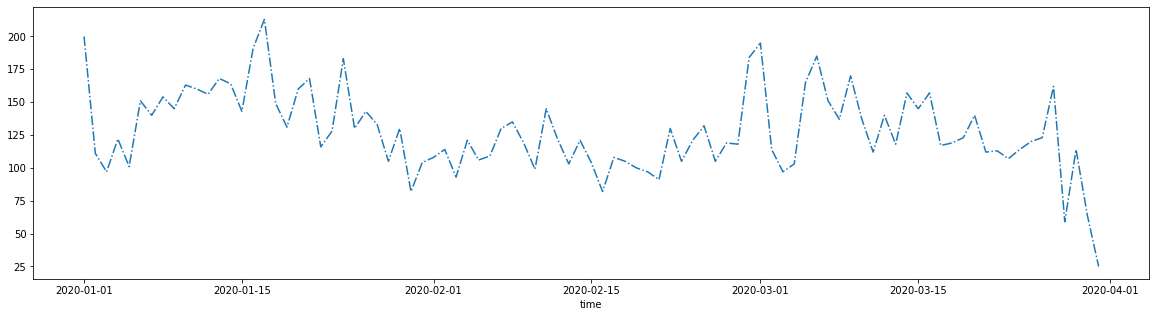

In [27]:
fig1, ax1 = plt.subplots(figsize=(20, 5))
df = data.groupby("time").count()["post"]
df.plot(ax=ax1, style='-.')
plt.show()

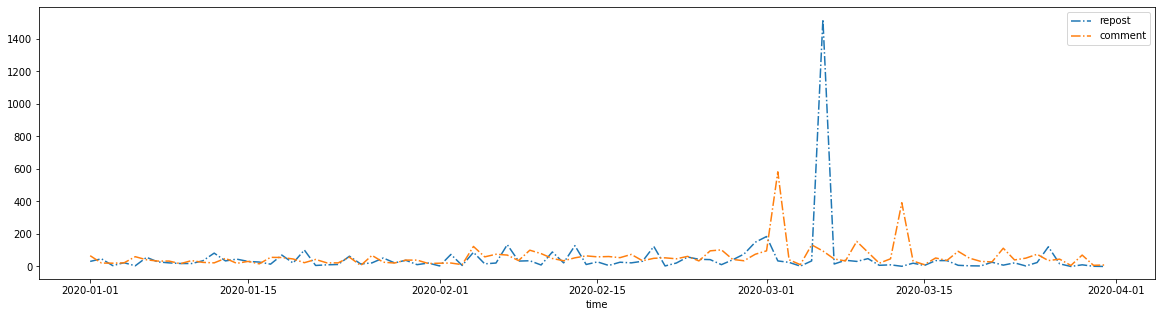

In [28]:
fig2, ax2 = plt.subplots(figsize=(20, 5))
df = data.groupby("time").sum()[["repost", "comment"]]
df.plot(ax=ax2, style='-.')
plt.show()

## 微博正文内容预处理

In [29]:
# only keep chinese text
# data["post"] = data["post"].str.replace("[^\u4e00-\u9fa5]","")

In [33]:
# 文本清洗/分词
preprocess = WeiboPreprocess()
data["post"] = data["post"].apply(lambda x: preprocess.preprocess(x))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\const\AppData\Local\Temp\jieba.cache
Loading model cost 0.632 seconds.
Prefix dict has been built succesfully.


In [ ]:
# get all kinds of vocabulary
def get_vocab(vocab_path):
    vacab = set()
    with open(vocab_path, encoding="utf-8") as f:
        vocab_list = [x.strip() for x in f.readlines()]
        vacab = set(vocab_list)
    return vacab

## 制作高频词词云

In [ ]:
# load stop words
stopwords = get_vocab(stop_words_path)

In [ ]:
def gen_wordcloud(text, save_to_file):
    wc = WordCloud(font_path=font_path, width=1000, height=860, scale=2, max_words=100, stopwords=stopwords, background_color="white", collocations=False).generate(text)
    wc.to_file(save_to_file)
    plt.imshow(wc)
    plt.axis("off")

In [ ]:
# generate wordcloud by date
date = "2020-1-20"
gen_wordcloud(data.groupby("time")["post"].sum()[pd.to_datetime(date).date()], os.path.join("../data/wordcloud", date + ".png"))

## 获取情绪高频词

In [ ]:
positive_words = get_vocab(positive_words_path)
negative_words = get_vocab(negative_words_path)

In [ ]:
from collections import Counter
postwords_list = data[data["is_original"]==True].groupby("time")["post"].sum()[pd.to_datetime("2020-1-20").date()].split()
pos_words_list = [word for word in postwords_list if word in positive_words]
neg_words_list = [word for word in postwords_list if word in negative_words]
pos_counter = Counter(pos_words_list)
pos_counter.most_common(10)

In [ ]:
neg_counter = Counter(neg_words_list)
neg_counter.most_common(10)